In [1]:
# import os
# import json
# import numpy as np
# import nibabel as nib


In [2]:
# import numpy as np
# import nibabel as nib
# import matplotlib.pyplot as plt


# hipp_vol  = 'output/sub-HCD0001305_hemi-R_space-cropB0_desc-DT_eigenvecs.nii.gz'
# hipp_surf = 'output/sub-HCD0001305_hemi-R_space-B0_den-0p5mm_label-hipp_midthickness.surf.gii'

# # Load volume
# nii = nib.load(hipp_vol)
# data = nii.get_fdata()
# affine = nii.affine

# # Load surface
# gii = nib.load(hipp_surf)
# coords = gii.darrays[1].data
# coords_vox = nib.affines.apply_affine(np.linalg.inv(affine), coords)


# fig, ax = plt.subplots(2, 3, figsize=(12,8))
# ax = ax.flatten()

# for idx, slice_idx in enumerate(np.linspace(30,65,6)):


#     # Plot volume data
#     slice_idx = int(slice_idx)
#     ax[idx].imshow(data[slice_idx, :, :, 2].T, cmap='gray', origin='lower')

#     # Plot surface vertices.
#     mask = np.abs(coords_vox[:,0] - slice_idx) < .5
#     ax[idx].scatter(
#         coords_vox[mask,1],
#         coords_vox[mask,2],
#         s=1, c='yellow'
#     )
#     ax[idx].axis('off')

# plt.tight_layout()
# plt.show()

In [3]:

# for hemi in ['L','R']:

#     # Transform cropped T1 to B0 space.
#     crop_T1 = config[f'hipp_crop_T1_{hemi}']
#     crop_B0 = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-preproc_T1w.nii.gz'

#     os.system(f'mrtransform {crop_T1} {crop_B0} -linear {B0_to_T1} -force')

#     # Crop and upsample (0.5mm) the diffusion weighted images.
#     crop_dwi_path = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-upsampled_dwi.nii.gz'
#     os.system(f'mrgrid {dwi_path} regrid -voxel 0.5 -template {crop_B0} {crop_dwi_path} -force')


#     # Fit diffusion tensor and kurtosis-tensor on cropped/upsampled DWI image.
#     dt_path  = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-diffusion_tensor.nii.gz'
#     dkt_path = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-diffusion_kurtosis_tensor.nii.gz'

#     os.system(f'dwi2tensor {crop_dwi_path} {dt_path} -dkt {dkt_path} -fslgrad {bvecs} {bvals} -force')


#     # Get diffusion tensor metrics.
#     adc_path      = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_ADC.nii.gz'
#     fa_path       = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_FA.nii.gz'
#     eigenval_path = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_eigenvals.nii.gz'
#     eigenvec_path = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_eigenvecs.nii.gz'

#     os.system(f'tensor2metric \
#         -fa    {fa_path} \
#         -adc   {adc_path} \
#         -value {eigenval_path} \
#         -vector {eigenvec_path} -num 1,2,3 \
#         {dt_path} \
#         -force'
#     )

#     # Merge all DKT params expected by DIPY.
#     dt_eigenvals = nib.load(eigenval_path).get_fdata()
#     dt_eigenvecs = nib.load(eigenvec_path).get_fdata()
#     dkt_params = nib.load(dkt_path).get_fdata()

#     params = np.concatenate([
#         dt_eigenvals,
#         dt_eigenvecs,
#         dkt_params
#         ], axis=-1
#     )

#     # Write DKT parameters to 4D NIFTI.
#     template_nii = nib.load(crop_dwi_path)
#     params_nii = nib.Nifti1Image(
#         params,
#         affine=template_nii.affine,
#         header=template_nii.header
#     )

#     dkt_params_path = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DKT_params.nii.gz'
#     nib.save(params_nii, dkt_params_path)


In [4]:

# for hemi in ['L','R']:

#     # Define paths.
#     crop_B0         = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-preproc_T1w.nii.gz'
#     crop_dwi_path   = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-upsampled_dwi.nii.gz'

#     dt_path         = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-diffusion_tensor.nii.gz'
#     dkt_path        = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-diffusion_kurtosis_tensor.nii.gz'

#     adc_path        = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_ADC.nii.gz'
#     fa_path         = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_FA.nii.gz'
#     eigenval_path   = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_eigenvals.nii.gz'
#     eigenvec_path   = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_eigenvecs.nii.gz'

#     dkt_params_path = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DKT_params.nii.gz'


#     # Transform cropped T1 to B0 space.
#     crop_T1 = config[f'hipp_crop_T1_{hemi}']
#     os.system(f'mrtransform {crop_T1} {crop_B0} -linear {B0_to_T1} -force')

#     # Crop and upsample the diffusion weighted images to 0.5mm resolution.
#     os.system(f'mrgrid {dwi_path} regrid -voxel 0.5 -template {crop_B0} {crop_dwi_path} -force')

#     # Fit diffusion-tensor and diffusion-kurtosis-tensor on cropped/upsampled DWI image.
#     os.system(f'dwi2tensor {crop_dwi_path} {dt_path} -dkt {dkt_path} -fslgrad {bvecs} {bvals} -force')

#     # Get diffusion-tensor metrics.
#     os.system(f'tensor2metric \
#         -fa    {fa_path} \
#         -adc   {adc_path} \
#         -value {eigenval_path} \
#         -vector {eigenvec_path} -num 1,2,3 \
#         {dt_path} \
#         -force'
#     )

#     # Merge all DKT params expected by DIPY.
#     dt_eigenvals = nib.load(eigenval_path).get_fdata()
#     dt_eigenvecs = nib.load(eigenvec_path).get_fdata()
#     dkt_params = nib.load(dkt_path).get_fdata()

#     params = np.concatenate([
#         dt_eigenvals,
#         dt_eigenvecs,
#         dkt_params
#         ], axis=-1
#     )

#     # Write DKT parameters to 4D NIFTI.
#     template_nii = nib.load(crop_dwi_path)
#     params_nii = nib.Nifti1Image(
#         params,
#         affine=template_nii.affine,
#         header=template_nii.header
#     )

#     nib.save(params_nii, dkt_params_path)



In [5]:
# # Fit diffusion tensor and kurtosis-tensor on full DWI image.
# dt_path  = f'output/sub-{subject}_space-B0_desc-DT_tensor.nii.gz'
# dkt_path = f'output/sub-{subject}_space-B0_desc-DKT_tensor.nii.gz'

# os.system(f'dwi2tensor {dwi} {dt_path} -dkt {dkt_path} -fslgrad {bvecs} {bvals} -force')


In [6]:

# # Fit diffusion tensor and kurtosis-tensor on cropped/upsampled DWI image.
# dt_path  = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-diffusion_tensor.nii.gz'
# dkt_path = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-diffusion_kurtosis_tensor.nii.gz'

# os.system(f'dwi2tensor {crop_dwi_path} {dt_path} -dkt {dkt_path} -fslgrad {bvecs} {bvals} -force')


In [7]:
# dt = nib.load(dt_image).get_fdata()
# dkt = nib.load(dkt_image).get_fdata()

In [8]:
# from dipy.io.image import load_nifti
# import dipy.reconst.dki as dki
# from dipy.io.gradients import read_bvals_bvecs
# from dipy.core.gradients import gradient_table


# bvals_dipy, bvecs_dipy = read_bvals_bvecs(bvals, bvecs)
# gtab = gradient_table(bvals_dipy, bvecs=bvecs_dipy)

# data, affine = load_nifti(upsampled_dwi)

# # dki_model = dki.DiffusionKurtosisModel(gtab)

# # dki_fit = dki_model.fit(data)

In [9]:
# # https://docs.dipy.org/1.11.0/reference/dipy.reconst.html#dipy.reconst.dki.apparent_kurtosis_coef

# FA = dki_fit.fa

# template_nii = nib.load(upsampled_dwi)


# new_nii = nib.Nifti1Image(FA, affine=template_nii.affine, header=template_nii.header)
# nib.save(new_nii, 'new_file.nii.gz')


In [10]:
# from dipy.reconst.dki import apparent_kurtosis_coef
# # from dipy.core.sphere import Sphere

# # hipp_surf_B0 = nib.load('output/sub-HCD0001305_hemi-R_space-B0_den-0p5mm_label-hipp_midthickness.surf.gii')
# # faces  = hipp_surf_B0.darrays[0].data
# # coords = hipp_surf_B0.darrays[1].data


# # # Compute normals for each face.
# # face_vectors1 = coords[faces[:,1]] - coords[faces[:,0]]
# # face_vectors2 = coords[faces[:,2]] - coords[faces[:,0]]
# # face_normals = np.cross(face_vectors1, face_vectors2)
# # face_normals /= np.linalg.norm(face_normals, axis=1, keepdims=True)

# # vertex_normals = np.zeros_like(coords)

# # # Average face normals for each vertex
# # for i in range(3):
# #     np.add.at(vertex_normals, faces[:, i], face_normals)

# # # Normalize vertex normals
# # vertex_normals /= np.linalg.norm(vertex_normals, axis=1, keepdims=True)


# # params = dki_fit.fit_array[30,36,49].model_params
# # sphere_normals = Sphere(xyz=vertex_normals)
# # K_normal = apparent_kurtosis_coef(dki_fit.model_params, sphere_normals)

# dt = nib.load(dt_image).get_fdata()
# dkt = nib.load(dkt_image).get_fdata()


# vox_x = 0
# vox_y = 0
# vox_z = 0

# dt[vox_x,vox_y,vox_z,:]

In [11]:
# # Get diffusion tensor metrics.
# adc_path      = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_ADC.nii.gz'
# fa_path       = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_FA.nii.gz'
# eigenval_path = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_eigenvals.nii.gz'
# eigenvec_path = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_eigenvecs.nii.gz'

# os.system(f'tensor2metric \
#     -fa    {fa_path} \
#     -adc   {adc_path} \
#     -value {eigenval_path} \
#     -vector {eigenvec_path} -num 1,2,3 \
#     {dt_image} \
#     -force'
# )

In [12]:
# dkt_params_path = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DKT_params.nii.gz'
# upsampled_dwi = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-upsampled_dwi.nii.gz'


# dt_eigenvals = nib.load('eigenvals.nii.gz').get_fdata()
# dt_eigenvecs = nib.load('eigenvecs.nii.gz').get_fdata()
# dkt_params = nib.load(dkt_image).get_fdata()

# params = np.concatenate([
#     dt_eigenvals,
#     dt_eigenvecs,
#     dkt_params
#     ], axis=-1
# )

# # Write DKT parameters to 4D NIFTI.
# template_nii = nib.load(upsampled_dwi)
# params_nii = nib.Nifti1Image(
#     params,
#     affine=template_nii.affine,
#     header=template_nii.header
# )

# nib.save(params_nii, 'params.nii.gz')


In [13]:
# import os
# import json
# import numpy as np
# import nibabel as nib

# with open('config.json') as f:
#     config = json.load(f)

# subject    = config['subject']

# dwi_path   = config['dwi']
# bvecs      = config['bvecs']
# bvals      = config['bvals']

# B0_to_T1   = config['B0_to_T1']


# def _regrid_DWI():
#     '''Create cropB0 space, then crop and upsample the diffusion weighted images to 0.5mm resolution.'''

#     os.system(f'mrtransform {crop_T1} {crop_B0} -linear {B0_to_T1} -force')
#     os.system(f'mrgrid {dwi_path} regrid -voxel 0.5 -template {crop_B0} {crop_dwi_path} -force')


# def _fit_tensors():
#     '''Fit diffusion tensor (DT) and diffusion-kurtosis-tensor (DTK) on cropped/upsampled DWI image.'''

#     os.system(f'dwi2tensor {crop_dwi_path} {dt_path} -dkt {dkt_path} -fslgrad {bvecs} {bvals} -force')


# def _get_tensor_metrics():
#     '''Get diffusion tensor metrics.'''

#     os.system(f'tensor2metric \
#         -fa     {fa_path} \
#         -adc    {adc_path} \
#         -value  {eigenval_path} \
#         -vector {eigenvec_path} -num 1,2,3 \
#         {dt_path} \
#         -force'
#     )


# def _merge_params():
#     '''Merge all DT and DKT params expected by DIPY.'''

#     dt_eigenvals = nib.load(eigenval_path).get_fdata()
#     dt_eigenvecs = nib.load(eigenvec_path).get_fdata()
#     dkt_params = nib.load(dkt_path).get_fdata()

#     params = np.concatenate([
#         dt_eigenvals,
#         dt_eigenvecs,
#         dkt_params
#         ], axis=-1
#     )

#     # Write DKT parameters to 4D NIFTI.
#     template_nii = nib.load(crop_dwi_path)
#     params_nii = nib.Nifti1Image(
#         params,
#         affine=template_nii.affine,
#         header=template_nii.header
#     )
#     nib.save(params_nii, dkt_params_path)






# for hemi in ['L','R']:

#     # Define paths.
#     crop_T1 = config[f'hipp_crop_T1_{hemi}']

#     crop_B0         = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-preproc_T1w.nii.gz'
#     crop_dwi_path   = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-upsampled_dwi.nii.gz'

#     dt_path         = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-diffusion_tensor.nii.gz'
#     dkt_path        = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-diffusion_kurtosis_tensor.nii.gz'

#     adc_path        = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_ADC.nii.gz'
#     fa_path         = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_FA.nii.gz'
#     eigenval_path   = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_eigenvals.nii.gz'
#     eigenvec_path   = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_eigenvecs.nii.gz'

#     dkt_params_path = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DKT_params.nii.gz'

#     # Run pipeline.
#     _regrid_DWI()
#     _fit_tensors()
#     _get_tensor_metrics()
#     _merge_params()



In [14]:
# import numpy as np
# import nibabel as nib
# from dipy.data import get_sphere
# from dipy.reconst import dki

# sphere_name = 'symmetric362'
# subject = 'HCD0001305'


# for hemi in ['L','R']:

#     params_nii = nib.load(f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DKT_params.nii.gz')
#     params = params_nii.get_fdata()

#     # Get directions.
#     sphere = get_sphere(name=sphere_name)
#     n_dirs = len(sphere.theta)

#     # Flatten voxels, calculate directional kurtosis, reshape.
#     X, Y, Z, P = params.shape

#     params_flat   = params.reshape(-1, P)
#     kurtosis_flat = dki.apparent_kurtosis_coef(params_flat, sphere)
#     kurtosis_vox  = kurtosis_flat.reshape(X, Y, Z, n_dirs)

#     # Write directional kurtosis to numpy and NIFTI.
#     kurtosis_path_npy = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-kurtosis_sphere-{sphere_name}.npy'
#     kurtosis_path_nii = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-kurtosis_sphere-{sphere_name}.nii.gz'

#     np.save(kurtosis_path_npy, kurtosis_vox)
#     kurtosis_nii = nib.Nifti1Image(
#         kurtosis_vox,
#         affine=params_nii.affine,
#         header=params_nii.header
#     )
#     nib.save(kurtosis_nii, kurtosis_path_nii)



In [15]:
# import matplotlib.pyplot as plt
# from dipy.data import get_sphere

# # Load spheres
# sphere_sym = get_sphere('symmetric362')
# v_sym = sphere_sym.vertices

# # Plot
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')
# for v in v_sym:
#     ax.plot(
#         [0, v[0]],
#         [0, v[1]],
#         [0, v[2]],
#         c='k', lw=.5
#     )

# ax.view_init(elev=30, azim=45)


In [16]:

# params_nii = nib.load(f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DKT_params.nii.gz')
# params = params_nii.get_fdata()

# # Get directions.
# sphere = get_sphere(name=sphere_name)
# n_dirs = len(sphere.theta)



In [17]:
# from nilearn import surface

# subject = 'HCD0001305'
# hemi = 'L'

# adc_path   = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-kurtosis_sphere-symmetric362.nii.gz'
# # mask_path  = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-subfields.nii.gz'

# inner_path = f'output/sub-{subject}_hemi-{hemi}_space-B0_den-0p5mm_label-hipp_inner.surf.gii'
# outer_path = f'output/sub-{subject}_hemi-{hemi}_space-B0_den-0p5mm_label-hipp_midthickness.surf.gii'


# surf_adc = surface.vol_to_surf(
#     img=adc_path,
#     surf_mesh=outer_path,
#     inner_mesh=inner_path,
#     interpolation='linear',
#     # mask_img=mask_path,
#     kind='depth'
# )



In [18]:
# import numpy as np
# import pandas as pd
# import nibabel as nib


# surf = nib.load('output/sub-HCD0001305_hemi-L_space-B0_den-0p5mm_label-hipp_inner.surf.gii')
# faces    = surf.darrays[0].data
# vertices = surf.darrays[1].data


# normals_df = pd.read_csv('output/sub-HCD0001305_hemi-L_space-B0_label-inner_desc-surface_normals.csv')
# normals = normals_df[['x','y','z']].to_numpy()

# t1_file = 'output/sub-HCD0001305_hemi-L_space-cropB0_desc-DT_ADC.nii.gz'
# t1_img = nib.load(t1_file)
# t1_data = t1_img.get_fdata()



# # Convert vertices to voxel coordinates
# homog = np.c_[vertices, np.ones(len(vertices))]
# vox_coords = (np.linalg.inv(t1_img.affine) @ homog.T)[:3].T

# # Sagittal slice index
# x_slice = 50
# slice_data = t1_data[x_slice,:,:]

# # Select vertices near this slice
# mask = np.abs(vox_coords[:,0]-x_slice) < 0.5
# slice_vertices = vox_coords[mask]
# slice_normals = -normals[mask]

# # Plot slice with normals
# plt.figure(figsize=(8,8))
# plt.imshow(slice_data.T, cmap='magma', origin='lower')

# scale = 1.0
# plt.quiver(
#     slice_vertices[:,1],
#     slice_vertices[:,2],
#     slice_normals[:,1]*scale,
#     slice_normals[:,2]*scale,
#     color='w', angles='xy', scale_units='xy'
# )

# plt.show()


In [19]:
# from dipy.reconst import dki


# # Get directions of sphere.
# sphere = get_sphere(name=sphere_name)
# theta = sphere.theta
# phi = sphere.phi

# x = np.sin(theta) * np.cos(phi)
# y = np.sin(theta) * np.sin(phi)
# z = np.cos(theta)
# sphere_dirs = np.stack([x, y, z], axis=1)
# n_dirs = sphere_dirs.shape[0]

# for hemi in ['L','R']:

#     # Get diffusion tensor eigenvectors/eigenvalues.
#     eigenvals = nib.load(f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_eigenvals.nii.gz').get_fdata()
#     eigenvecs = nib.load(f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_eigenvecs.nii.gz').get_fdata()
#     n_vox = eigenvals.shape[0]

#     vox_diffusion = np.zeros([n_vox, n_vox, n_vox, n_dirs])

#     for x in range(n_vox):
#         for y in range(n_vox):
#             for z in range(n_vox):

#                 vox_eigenvecs = eigenvecs[x,y,z,:].reshape(3,3)
#                 vox_eigenvals = eigenvals[x,y,z,:]

#                 # DIPY order: Dxx, Dxy, Dyy, Dxz, Dyz, Dzz
#                 # https://docs.dipy.org/dev/examples_built/reconstruction/reconst_dti.html

#                 D = vox_eigenvecs @ np.diag(vox_eigenvals) @ vox_eigenvecs.T
#                 dt_params = np.array([
#                     D[0,0],
#                     D[0,1],
#                     D[1,1],
#                     D[0,2],
#                     D[1,2],
#                     D[2,2]
#                 ])

#                 vox_diffusion[x,y,z,:] = dki.directional_diffusion(dt_params, sphere_dirs)


#     vox_diffusion_path  = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-diffusion_sphere-{sphere_name}.nii.gz'
#     params_nii = nib.load(f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DKT_params.nii.gz')

#     nii = nib.Nifti1Image(
#         vox_diffusion,
#         affine=params_nii.affine,
#         header=params_nii.header
#     )
#     nib.save(nii, vox_diffusion_path)


In [20]:
# # Get directions of sphere.
# sphere = get_sphere(name=sphere_name)
# theta = sphere.theta
# phi = sphere.phi

# x = np.sin(theta) * np.cos(phi)
# y = np.sin(theta) * np.sin(phi)
# z = np.cos(theta)
# sphere_dirs = np.stack([x, y, z], axis=1)


# # Get directions of surface-normals.
# surf_normals_df = pd.read_csv(f'output/sub-{subject}_hemi-{hemi}_space-B0_label-inner_desc-surface_normals.csv')
# surf_normals = -surf_normals_df[['x','y','z']].to_numpy()


# # Calculate difference in angle between sphere-directions and surface-normals.
# angle_diffs = np.zeros([len(sphere_dirs), len(surf_normals)])

# for sphere_idx, sphere_dir in enumerate(sphere_dirs):
#     for normal_idx, normal_dir in enumerate(normals):

#         cos_theta = np.clip(np.dot(sphere_dir, normal_dir), -1, 1)
#         angle_diffs[sphere_idx, normal_idx] = np.arccos(cos_theta) * 180/np.pi


In [21]:
# # Get directions of sphere.
# sphere = get_sphere(name=sphere_name)
# theta = sphere.theta
# phi = sphere.phi

# x = np.sin(theta) * np.cos(phi)
# y = np.sin(theta) * np.sin(phi)
# z = np.cos(theta)
# sphere_dirs = np.stack([x, y, z], axis=1)


# # Get directions of surface-normals.
# surf_normals_df = pd.read_csv(f'output/sub-{subject}_hemi-{hemi}_space-B0_label-inner_desc-surface_normals.csv')
# surf_normals = -surf_normals_df[['x','y','z']].to_numpy()


# # Calculate difference in angle between sphere-directions and surface-normals.
# angle_diffs = np.zeros([len(sphere_dirs), len(surf_normals)])

# for sphere_idx, sphere_dir in enumerate(sphere_dirs):
#     for normal_idx, normal_dir in enumerate(normals):

#         cos_theta = np.clip(np.dot(sphere_dir, normal_dir), -1, 1)
#         angle_diffs[sphere_idx, normal_idx] = np.arccos(cos_theta) * 180/np.pi

# np.save(f'output/sub-{subject}_hemi-{hemi}_label-inner_desc-surface_normal_direction.npy', angle_diffs)


# # Group sphere-directions into: normal, tangential, or oblique based on angle to surface-normal.
# n_vertices = len(surf_normals)

# vertex_direction = []
# for idx, vertex in enumerate(range(n_vertices)):

#     dir_group = np.zeros(len(sphere_dirs), dtype='<U10')

#     normal     = (angle_diffs[:,vertex] <= 30) | (angle_diffs[:,vertex] >= 150)
#     tangential = (angle_diffs[:,vertex] >= 60) & (angle_diffs[:,vertex] <= 120)
#     oblique    = (normal == False) & (tangential == False)

#     dir_group[normal]     = 'normal'
#     dir_group[tangential] = 'tangential'
#     dir_group[oblique]    = 'oblique'

#     vertex_direction.append(dir_group)

# vertex_direction = np.array(vertex_direction)

# np.save(f'output/sub-{subject}_hemi-{hemi}_label-inner_desc-surface_normal_group.npy', vertex_direction)


In [131]:
import numpy as np
import pandas as pd
import nibabel as nib

from nilearn import surface


subject = 'HCD0001305'
hemi = 'L'

dir_group = np.load(f'output/sub-{subject}_hemi-{hemi}_label-inner_desc-surface_normal_group.npy')
dir_diffusion     = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-diffusion_sphere-symmetric362.nii.gz'
inner_path        = f'output/sub-{subject}_hemi-{hemi}_space-B0_den-0p5mm_label-hipp_inner.surf.gii'


dir_diffusion_surf = surface.vol_to_surf(
    img=dir_diffusion,
    surf_mesh=inner_path,
    interpolation='linear'
)

In [132]:
def create_func_gii(data, hemi, map_names):
    '''Convert data-arrays to func GIFTI.'''

    darrays = []
    for x, map_name in zip(data, map_names):
        darray = nib.gifti.GiftiDataArray(
            np.array(x, dtype='float32'),
            intent=nib.nifti1.intent_codes['NIFTI_INTENT_NONE'])
        darray.meta = nib.gifti.GiftiMetaData({'Name':map_name})
        darrays.append(darray)

    # Create meta-data.
    if hemi == 'L': meta = nib.gifti.GiftiMetaData({'AnatomicalStructurePrimary':'HippocampusLeft'})
    if hemi == 'R': meta = nib.gifti.GiftiMetaData({'AnatomicalStructurePrimary':'HippocampusRight'})

    # Create final GIFTI.
    gifti = nib.GiftiImage(darrays=darrays, meta=meta)

    return gifti


darrays = []
for group in ['normal','tangential','oblique']:

    masked = dir_diffusion_surf.copy()
    masked[dir_group != group] = np.nan
    darrays.append(np.nanmean(masked, axis=1))



gii = create_func_gii(
    darrays,
    hemi=hemi,
    map_names=['normal','tangential','oblique']
)

nib.save(gii, 'output/test.L.func.gii')

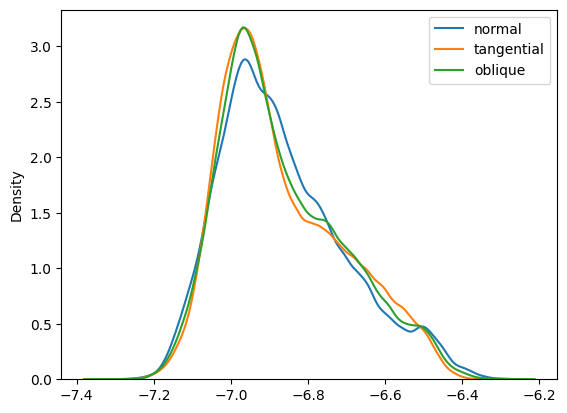

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-6.05796,2.060971e+06,two-sided,1.378822e-09,"[-0.0, -0.0]",0.00814,1.41e+05,0.99998


In [133]:
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt


sns.kdeplot(np.log(dir_diffusion_surf[dir_group == 'normal']), label='normal')
sns.kdeplot(np.log(dir_diffusion_surf[dir_group == 'tangential']), label='tangential')
sns.kdeplot(np.log(dir_diffusion_surf[dir_group == 'oblique']), label='oblique')
plt.legend()
plt.show()

pg.ttest(
    dir_diffusion_surf[dir_group == 'tangential'],
    dir_diffusion_surf[dir_group == 'oblique']
)


In [135]:
# from scipy.ndimage import map_coordinates

# distances = np.linspace(0, -4, 10)

# n_vertices = vertices.shape[0]
# n_steps = len(distances)

# normals = normals / np.linalg.norm(normals, axis=1, keepdims=True)

# # Create sampling points
# points = (
#     vertices[:, None, :] +
#     distances[None, :, None] * normals[:, None, :]
# )

# # Reorder for map_coordinates: (3, N)
# coords = np.vstack([
#     points[..., 0].ravel(),
#     points[..., 1].ravel(),
#     points[..., 2].ravel()
# ])

# # Interpolate
# samples = map_coordinates(
#     volume,
#     coords,
#     order=order,
#     mode='nearest'
# )

# aff = t1_img.affine
# inv_aff = np.linalg.inv(aff)

# verts_vox = nib.affines.apply_affine(inv_aff, vertices)

In [148]:
# from dipy.reconst import dki

# subject = 'HCD0001305'

# for hemi in ['L','R']:

#     params_nii = nib.load(f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DKT_params.nii.gz')
#     params = params_nii.get_fdata()

#     # Flatten voxels, calculate directional kurtosis, reshape.
#     X, Y, Z, P = params.shape

#     params_flat   = params.reshape(-1, P)
#     kurtosis_flat = dki.mean_kurtosis(params_flat)
#     mean_kurtosis  = kurtosis_flat.reshape(X, Y, Z)

#     # Write directional kurtosis to numpy and NIFTI.
#     kurtosis_path_npy = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-kurtosis_mean.npy'
#     kurtosis_path_nii = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-kurtosis_mean.nii.gz'

#     np.save(kurtosis_path_npy, mean_kurtosis)

#     kurtosis_nii = nib.Nifti1Image(
#         mean_kurtosis,
#         affine=params_nii.affine,
#         header=params_nii.header
#     )
#     nib.save(kurtosis_nii, kurtosis_path_nii)



In [ ]:
from dipy.data import get_sphere
from dipy.reconst import dki_micro

subject = 'HCD0001305'
hemi = 'L'


params_nii = nib.load(f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DKT_params.nii.gz')
params = params_nii.get_fdata()

# Flatten voxels, calculate directional kurtosis, reshape.
X, Y, Z, P = params.shape

params_flat   = params.reshape(-1, P)
kurtosis_flat = dki_micro.axonal_water_fraction(params_flat)
mean_kurtosis  = kurtosis_flat.reshape(X, Y, Z)

# # Write directional kurtosis to numpy and NIFTI.
# kurtosis_path_npy = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-kurtosis_mean.npy'
# kurtosis_path_nii = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-kurtosis_mean.nii.gz'

# np.save(kurtosis_path_npy, mean_kurtosis)

# kurtosis_nii = nib.Nifti1Image(
#     mean_kurtosis,
#     affine=params_nii.affine,
#     header=params_nii.header
# )
# nib.save(kurtosis_nii, kurtosis_path_nii)


/var/folders/78/_dqt2qqj5k59zckb0dg34l140000gn/T/ipykernel_99991/1094930819.py:5: UserWarning: Pass ['bvecs'] as keyword args. From version 2.0.0 passing these as positional arguments will result in an error. 
  gtab = gradient_table(bvals, bvecs)
/Users/jkember/Documents/projects/hippocampus_dMRI/.venv/lib/python3.11/site-packages/dipy/core/geometry.py:150: UserWarning: 'where' used without 'out', expect unitialized memory in output. If this is intentional, use out=None.
  cos = np.divide(z, r, where=r > 0)
/Users/jkember/Documents/projects/hippocampus_dMRI/.venv/lib/python3.11/site-packages/dipy/core/geometry.py:151: UserWarning: 'where' used without 'out', expect unitialized memory in output. If this is intentional, use out=None.
  theta = np.arccos(cos, where=(cos >= -1) & (cos <= 1))


(array([22., 22., 24., 24., 34., 28., 40., 66., 58., 44.]),
 array([0.92085202, 0.94170131, 0.96255061, 0.98339991, 1.0042492 ,
        1.0250985 , 1.0459478 , 1.06679709, 1.08764639, 1.10849568,
        1.12934498]),
 <BarContainer object of 10 artists>)

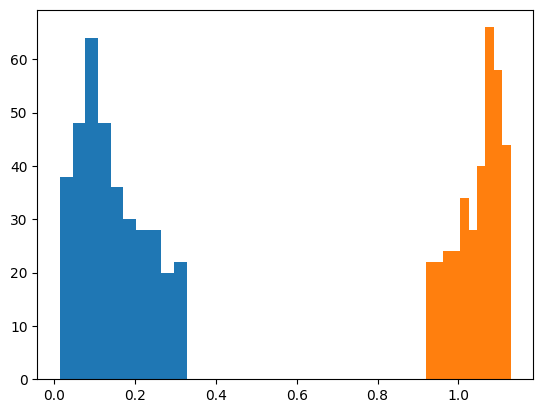

In [ ]:
from dipy.data import get_sphere
from dipy.core.gradients import gradient_table


gtab = gradient_table(bvals, bvecs)

# Get directions of sphere.
sphere_name = 'symmetric362'
sphere = get_sphere(name=sphere_name)
theta = sphere.theta
phi = sphere.phi

x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)
sphere_dirs = np.stack([x, y, z], axis=1)


extra_tensor, intra_tensor = dki_micro.diffusion_components(params_flat[500_000])
extra_diff = dki.directional_diffusion(extra_tensor, sphere_dirs)
intra_diff = dki.directional_diffusion(intra_tensor, sphere_dirs)




plt.hist(intra_diff * awf * 1e3)
plt.hist(extra_diff * 1e3)



In [58]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

subject = 'HCD0001305'
hemi = 'L'

gii = nib.load('direction_diffusion.L.func.gii')

awf = gii.darrays[0].data
intra_norm = gii.darrays[1].data
intra_tan  = gii.darrays[2].data

vertex = 1000

w_norm = (intra_norm[vertex] / (intra_norm[vertex] + intra_tan[vertex]))  * awf[vertex]
w_tan  = (intra_tan[vertex]  / (intra_tan[vertex]  + intra_norm[vertex])) * awf[vertex]
w_non  = (1 - awf[vertex])


print(f'Neurite volume [surface-normal]:       {w_norm*100:.2f}%')
print(f'Neurite volume [surface-tangential]:   {w_tan*100:.2f}%')
print(f'Non-neurite volume:                    {w_non*100:.2f}%')


w_norm = (intra_norm / (intra_norm + intra_tan))  * awf
w_tan  = (intra_tan  / (intra_tan  + intra_norm)) * awf
w_non  = (1 - awf)

w_norm.mean(), w_tan.mean(), w_non.mean()

Neurite volume [surface-normal]:       12.81%
Neurite volume [surface-tangential]:   9.80%
Non-neurite volume:                    77.39%


(0.11279781, 0.10901241, 0.7781898)

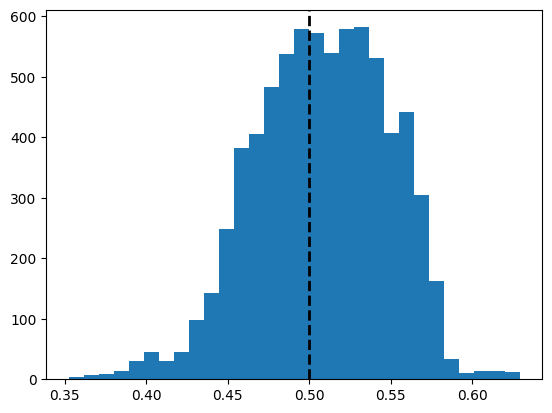

In [71]:
plt.hist(w_norm / awf, 30)
plt.axvline(.5, lw=2, c='k', ls='--')


In [57]:
from sklearn.decomposition import PCA

X = np.vstack([intra_norm, intra_tan]).T
pca = PCA(n_components=2).fit_transform(X)


intent = nib.nifti1.intent_codes['NIFTI_INTENT_NONE']
if hemi == 'L': meta = nib.gifti.GiftiMetaData({'AnatomicalStructurePrimary':'HippocampusLeft'})
if hemi == 'R': meta = nib.gifti.GiftiMetaData({'AnatomicalStructurePrimary':'HippocampusRight'})

darrays = []
for map_name, data in zip(['pc1','pc2'], [pca[:,0], pca[:,1]]):
    darray = nib.gifti.GiftiDataArray(np.array(data, dtype='float32'), intent=intent)
    darray.meta = nib.gifti.GiftiMetaData({'Name':map_name})
    darrays.append(darray)

gii = nib.GiftiImage(darrays=darrays, meta=meta)
nib.save(gii, 'diffusion_PC.L.func.gii')




(np.float32(0.5116459), np.float32(0.51447165), np.float32(0.5153105))

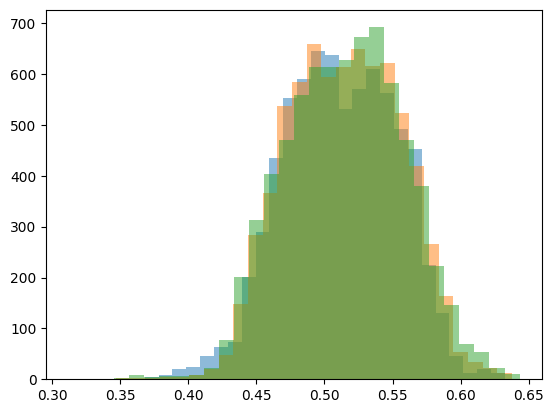

In [26]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

awf_data_inner = nib.load(f'output_model/sub-HCD0001305_hemi-L_surf-inner_desc-model_params.L.func.gii').darrays[0].data
awf_data_outer = nib.load(f'output_model/sub-HCD0001305_hemi-L_surf-outer_desc-model_params.L.func.gii').darrays[0].data
awf_data_mid   = nib.load(f'output_model/sub-HCD0001305_hemi-L_surf-midthickness_desc-model_params.L.func.gii').darrays[0].data


norm_data_inner = nib.load(f'output_model/sub-HCD0001305_hemi-L_surf-inner_desc-model_params.L.func.gii').darrays[1].data
norm_data_outer = nib.load(f'output_model/sub-HCD0001305_hemi-L_surf-outer_desc-model_params.L.func.gii').darrays[1].data
norm_data_mid   = nib.load(f'output_model/sub-HCD0001305_hemi-L_surf-midthickness_desc-model_params.L.func.gii').darrays[1].data

tan_data_inner = nib.load(f'output_model/sub-HCD0001305_hemi-L_surf-inner_desc-model_params.L.func.gii').darrays[2].data
tan_data_outer = nib.load(f'output_model/sub-HCD0001305_hemi-L_surf-outer_desc-model_params.L.func.gii').darrays[2].data
tan_data_mid   = nib.load(f'output_model/sub-HCD0001305_hemi-L_surf-midthickness_desc-model_params.L.func.gii').darrays[2].data


data_inner = norm_data_inner / (norm_data_inner + tan_data_inner) #* awf_data_inner
data_mid   = norm_data_mid   / (norm_data_mid   + tan_data_mid)   #* awf_data_mid
data_outer = norm_data_outer / (norm_data_outer + tan_data_outer) #* awf_data_outer


plt.hist(data_inner, 30, alpha=.5)
plt.hist(data_mid, 30, alpha=.5)
plt.hist(data_outer, 30, alpha=.5)

np.mean(data_inner), np.mean(data_mid), np.mean(data_outer)

120.177055 16.405394
122.24002 17.430891


np.float32(2.0629642)

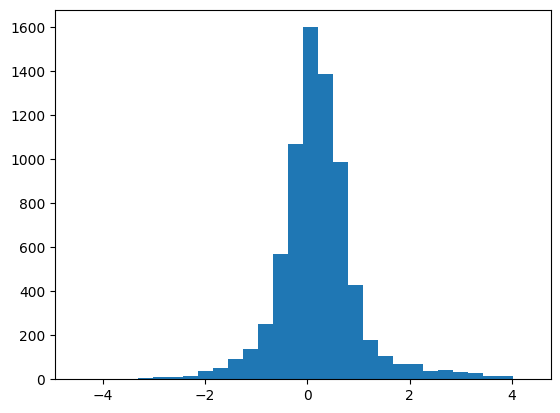

In [19]:

from scipy import stats

plt.hist((data_outer - data_inner) * 100, 30)

stats.ttest_1samp((data_outer - data_inner)* 100, 0)


print(data_inner.mean()* 1e3, data_inner.std()* 1e3)
print(data_outer.mean()* 1e3, data_outer.std()* 1e3)

((data_outer - data_inner)).mean() * 1e3